# Market Segmentation with Clustering

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#clustering model library
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

In [132]:
data = pd.read_csv('vacation.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,ID,Gender,Age,Education,Occupation,State,Relationship.Status,Obligation,Obligation2,NEP,...,life style of the local people,intense experience of nature,cosiness/familiar atmosphere,maintain unspoilt surroundings,everything organised,unspoilt nature/natural landscape,cultural offers,change of surroundings,Income(k$),Expenditure
0,1,Female,25,6.0,Clerical or service worker,VIC,single,4.800000,Q4,3.200000,...,no,no,no,no,no,no,no,no,15.0,39.0
1,2,Female,31,8.0,professional,WA,married,3.300000,Q1,3.400000,...,yes,no,no,no,no,no,no,yes,15.0,81.0
2,3,Male,21,3.0,NaN,NSW,single,3.400000,Q2,3.066667,...,yes,no,yes,no,no,no,yes,no,16.0,6.0
3,4,Female,18,2.0,unemployed,NSW,single,2.633333,Q1,3.400000,...,no,yes,no,no,no,no,no,yes,16.0,77.0
4,5,Male,61,3.0,retired,WA,married,3.400000,Q2,3.733333,...,yes,no,no,yes,no,no,no,no,17.0,40.0


In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 1000 non-null   int64  
 1   Gender                             1000 non-null   object 
 2   Age                                1000 non-null   int64  
 3   Education                          992 non-null    float64
 4   Occupation                         941 non-null    object 
 5   State                              1000 non-null   object 
 6   Relationship.Status                996 non-null    object 
 7   Obligation                         1000 non-null   float64
 8   Obligation2                        1000 non-null   object 
 9   NEP                                1000 non-null   float64
 10  Vacation.Behaviour                 975 non-null    float64
 11  rest and relax                     1000 non-null   object

In [134]:
print(pd.isnull(data).sum())

ID                                     0
Gender                                 0
Age                                    0
Education                              8
Occupation                            59
State                                  0
Relationship.Status                    4
Obligation                             0
Obligation2                            0
NEP                                    0
Vacation.Behaviour                    25
rest and relax                         0
luxury / be spoilt                     0
do sports                              0
excitement, a challenge                0
not exceed planned budget              0
realise creativity                     0
fun and entertainment                  0
good company                           0
health and beauty                      0
free-and-easy-going                    0
entertainment facilities               0
not care about prices                  0
life style of the local people         0
intense experien

In [135]:
data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
print(pd.isnull(data).sum())

ID                                   0
Gender                               0
Age                                  0
Education                            0
Occupation                           0
State                                0
Relationship.Status                  0
Obligation                           0
Obligation2                          0
NEP                                  0
Vacation.Behaviour                   0
rest and relax                       0
luxury / be spoilt                   0
do sports                            0
excitement, a challenge              0
not exceed planned budget            0
realise creativity                   0
fun and entertainment                0
good company                         0
health and beauty                    0
free-and-easy-going                  0
entertainment facilities             0
not care about prices                0
life style of the local people       0
intense experience of nature         0
cosiness/familiar atmosph

In [136]:
data.describe()

,ID,Age,Education,Obligation,NEP,Vacation.Behaviour,Income(k$),Expenditure
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,100.617021,44.776596,5.037234,3.762234,3.664894,2.936464,60.611702,51.005319
std,58.113591,14.118031,2.489270,0.625359,0.564779,0.661095,26.483842,25.955020
min,1.000000,18.000000,1.000000,1.000000,2.266667,1.551724,15.000000,1.000000
25%,50.750000,35.000000,3.000000,3.433333,3.266667,2.410714,41.500000,35.000000
50%,101.500000,42.000000,6.000000,3.833333,3.666667,2.929803,62.000000,50.000000
75%,150.250000,58.000000,7.000000,4.141667,4.133333,3.435000,78.000000,73.000000
max,200.000000,84.000000,8.000000,5.000000,5.000000,4.545455,137.000000,99.000000


In [137]:
data.corr()

,ID,Age,Education,Obligation,NEP,Vacation.Behaviour,Income(k$),Expenditure
ID,1.000000,0.129412,-0.145179,-0.015188,0.017554,0.105743,0.977143,0.009035
Age,0.129412,1.000000,-0.217661,0.096415,0.091652,0.088241,0.148038,-0.039035
Education,-0.145179,-0.217661,1.000000,-0.102149,-0.037483,-0.105066,-0.161605,0.047340
Obligation,-0.015188,0.096415,-0.102149,1.000000,0.361037,0.481686,-0.033803,-0.029299
NEP,0.017554,0.091652,-0.037483,0.361037,1.000000,0.289770,-0.012941,0.008488
Vacation.Behaviour,0.105743,0.088241,-0.105066,0.481686,0.289770,1.000000,0.099979,-0.031679
Income(k$),0.977143,0.148038,-0.161605,-0.033803,-0.012941,0.099979,1.000000,0.005775
Expenditure,0.009035,-0.039035,0.047340,-0.029299,0.008488,-0.031679,0.005775,1.000000


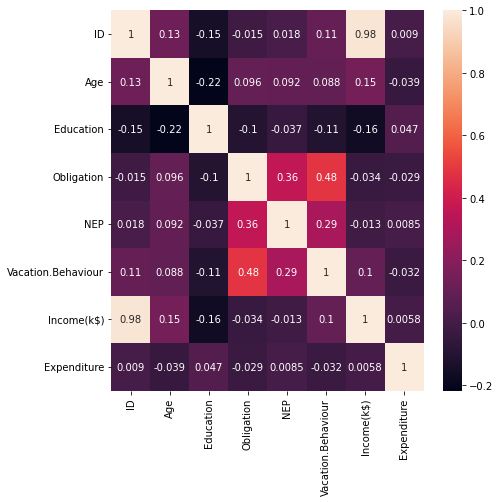

In [138]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(), annot=True)
plt.show()

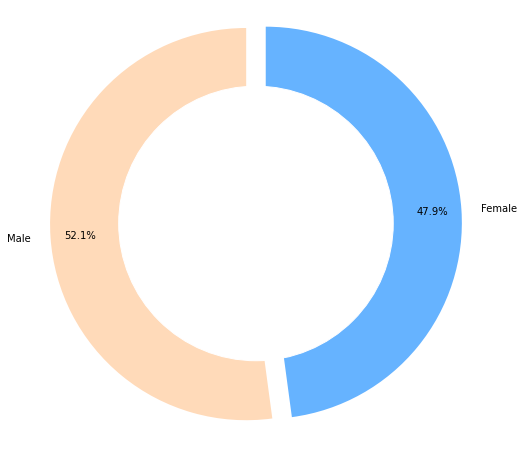

In [139]:
labels = ['Male','Female']
sizes = [data.query('Gender == "Male"').Gender.count(),data.query('Gender == "Female"').Gender.count()]
#colors
colors = ['#ffdaB9','#66b3ff']
#explsion
explode = (0.05,0.05)
plt.figure(figsize=(8,8)) 
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85,explode=explode)
p=plt.gcf()
plt.axis('equal')
p.gca().add_artist(my_circle)
plt.show()

/home/reddy/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


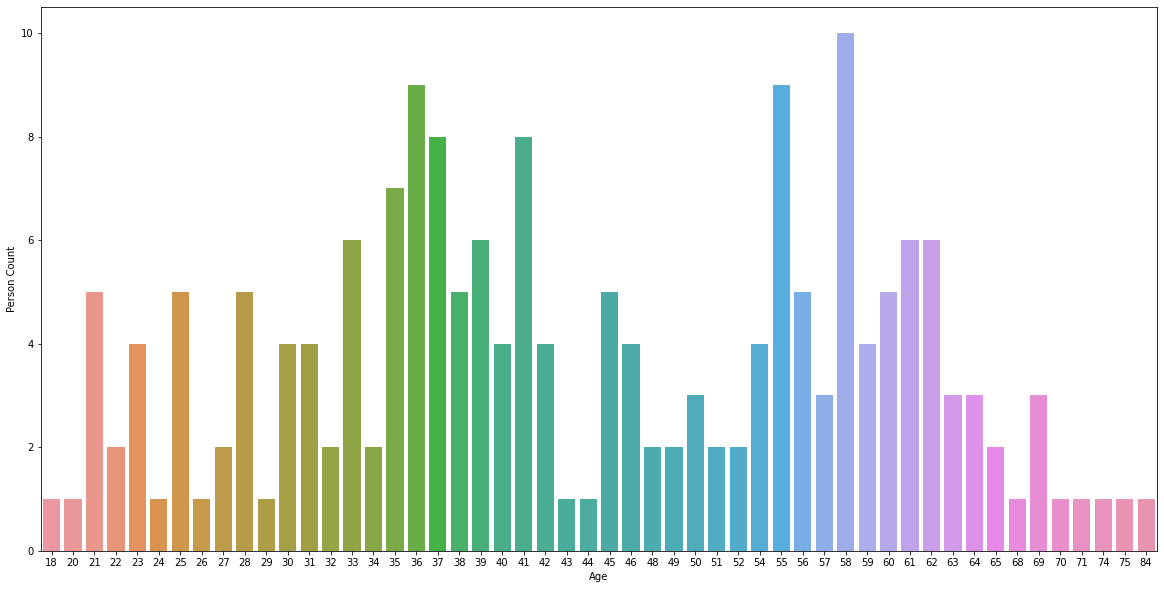

In [141]:
plt.figure(figsize=(20,10))
sns.countplot(data.Age)
plt.xlabel("Age")
plt.ylabel("Person Count")
plt.show()

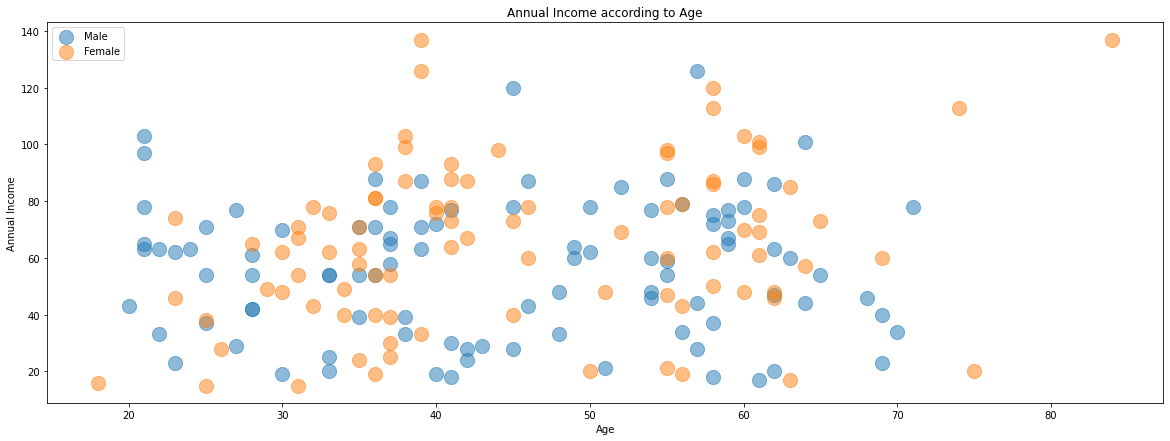

In [142]:
plt.figure(figsize=(20,7))
gender = ['Male', 'Female']
for i in gender:
    plt.scatter(x='Age',y='Income(k$)', data=data[data['Gender']==i],s = 200 , alpha = 0.5 , label = i)
plt.legend()
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.title("Annual Income according to Age")
plt.show()

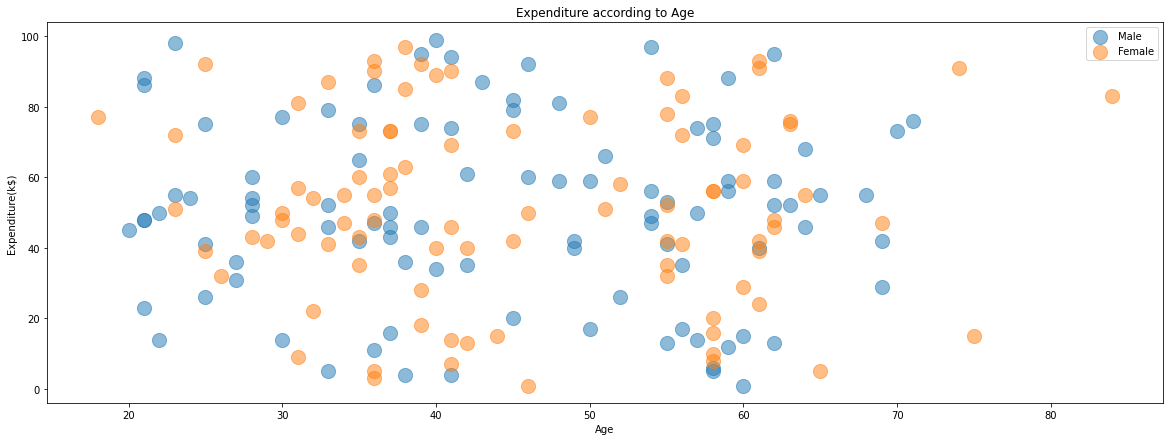

In [145]:
plt.figure(figsize=(20,7))
gender = ['Male', 'Female']
for i in gender:
    plt.scatter(x='Age',y='Expenditure', data=data[data['Gender']==i],s = 200 , alpha = 0.5 , label = i)
plt.legend()
plt.xlabel("Age")
plt.ylabel("Expenditure(k$)")
plt.title("Expenditure according to Age")
plt.show()

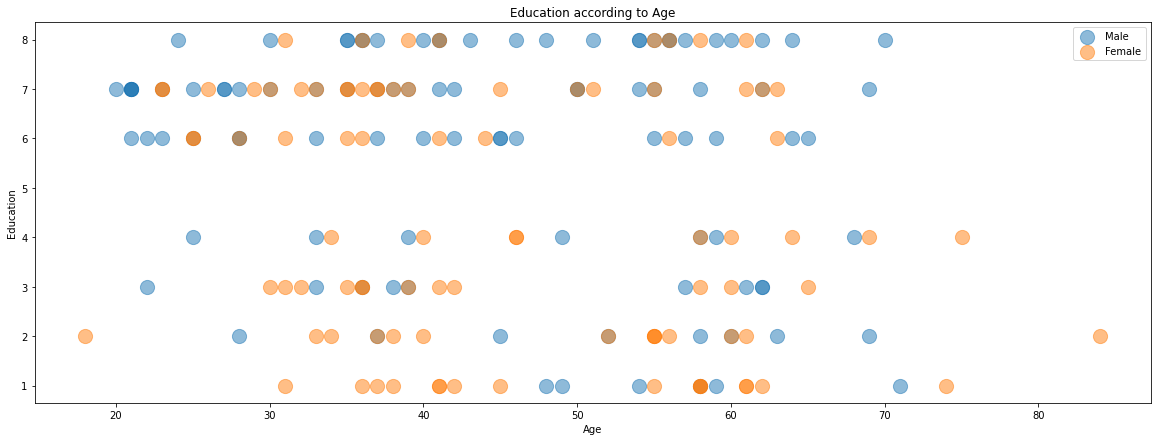

In [143]:
plt.figure(figsize=(20,7))
gender = ['Male', 'Female']
for i in gender:
    plt.scatter(x='Age',y='Education', data=data[data['Gender']==i],s = 200 , alpha = 0.5 , label = i)
plt.legend()
plt.xlabel("Age")
plt.ylabel("Education")
plt.title("Education according to Age")
plt.show()

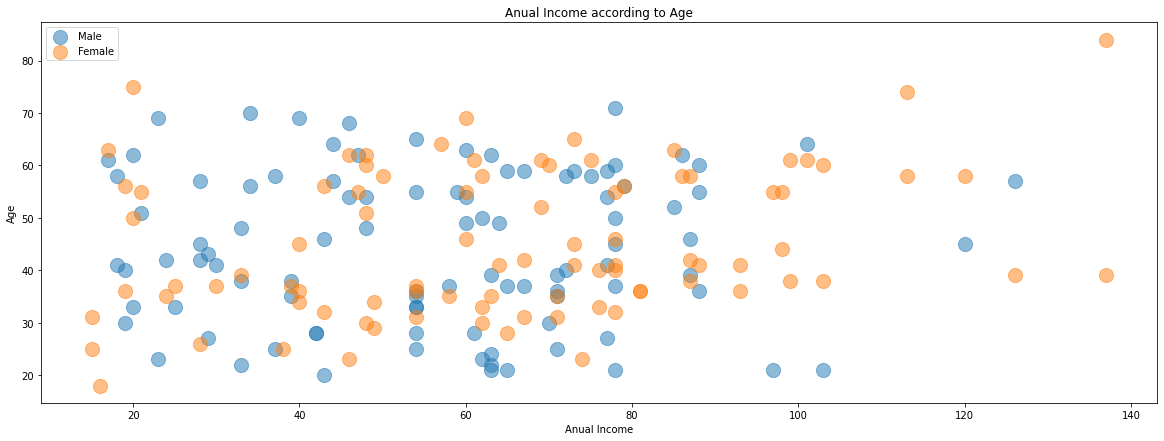

In [144]:
plt.figure(figsize=(20,7))
gender = ['Male', 'Female']
for i in gender:
    plt.scatter(x='Income(k$)',y='Age', data=data[data['Gender']==i],s = 200 , alpha = 0.5 , label = i)
plt.legend()
plt.xlabel("Anual Income")
plt.ylabel("Age")
plt.title("Anual Income according to Age")
plt.show()

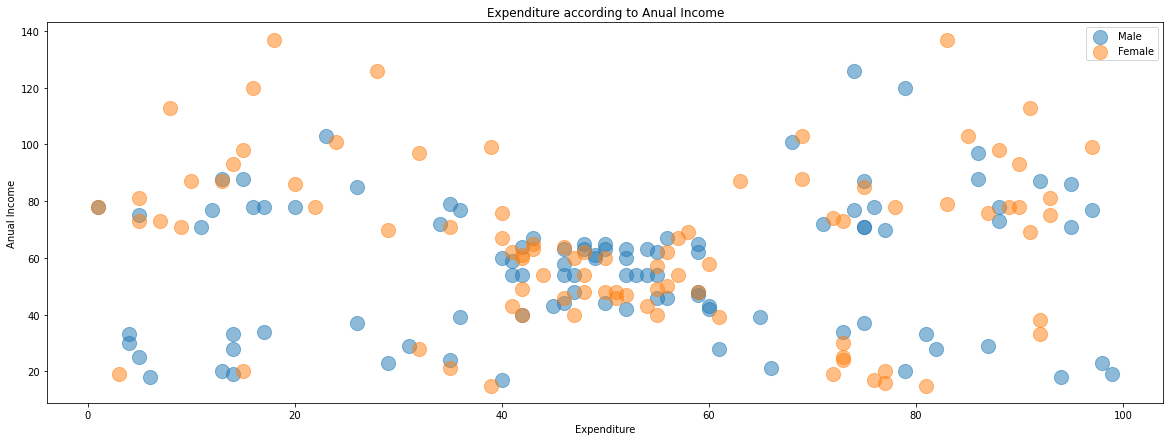

In [146]:
plt.figure(figsize=(20,7))
gender = ['Male', 'Female']
for i in gender:
    plt.scatter(x='Expenditure',y='Income(k$)', data=data[data['Gender']==i],s = 200 , alpha = 0.5 , label = i)
plt.legend()
plt.xlabel("Expenditure")
plt.ylabel("Anual Income")
plt.title("Expenditure according to Anual Income")
plt.show()

### Convert yes/no to 1/0

In [147]:
data.replace(('yes', 'no'), (1, 0), inplace=True)
data.head()

,ID,Gender,Age,Education,Occupation,State,Relationship.Status,Obligation,Obligation2,NEP,...,life style of the local people,intense experience of nature,cosiness/familiar atmosphere,maintain unspoilt surroundings,everything organised,unspoilt nature/natural landscape,cultural offers,change of surroundings,Income(k$),Expenditure
0,1,Female,25,6.0,Clerical or service worker,VIC,single,4.800000,Q4,3.200000,...,0,0,0,0,0,0,0,0,15.0,39.0
1,2,Female,31,8.0,professional,WA,married,3.300000,Q1,3.400000,...,1,0,0,0,0,0,0,1,15.0,81.0
3,4,Female,18,2.0,unemployed,NSW,single,2.633333,Q1,3.400000,...,0,1,0,0,0,0,0,1,16.0,77.0
4,5,Male,61,3.0,retired,WA,married,3.400000,Q2,3.733333,...,1,0,0,1,0,0,0,0,17.0,40.0
5,6,Female,63,7.0,retired,QLD,married,4.400000,Q4,4.266667,...,0,0,1,0,0,0,0,0,17.0,76.0


# Implement Clustering Algorithms

## K-Means Clustering Algorithm

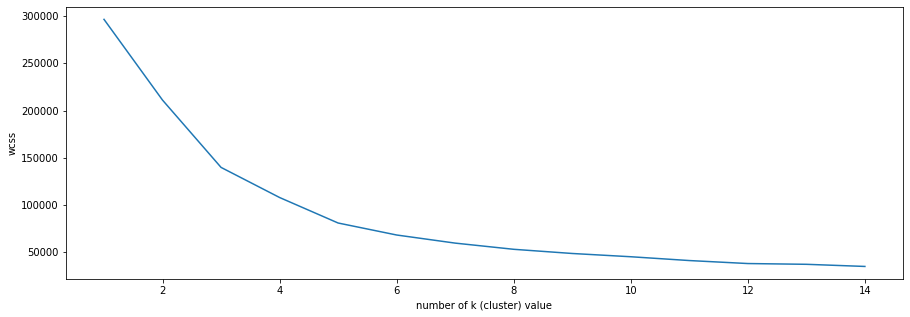

In [148]:
#define k value
from sklearn import preprocessing
wcss = []
data_model = data.drop(['Gender','ID','Occupation','State', 'Relationship.Status', 'Obligation2'],axis=1)
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_model)
    wcss.append(kmeans.inertia_)

# the best value is elbow value. It's 5.
plt.figure(figsize=(15,5))
plt.plot(range(1,15),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

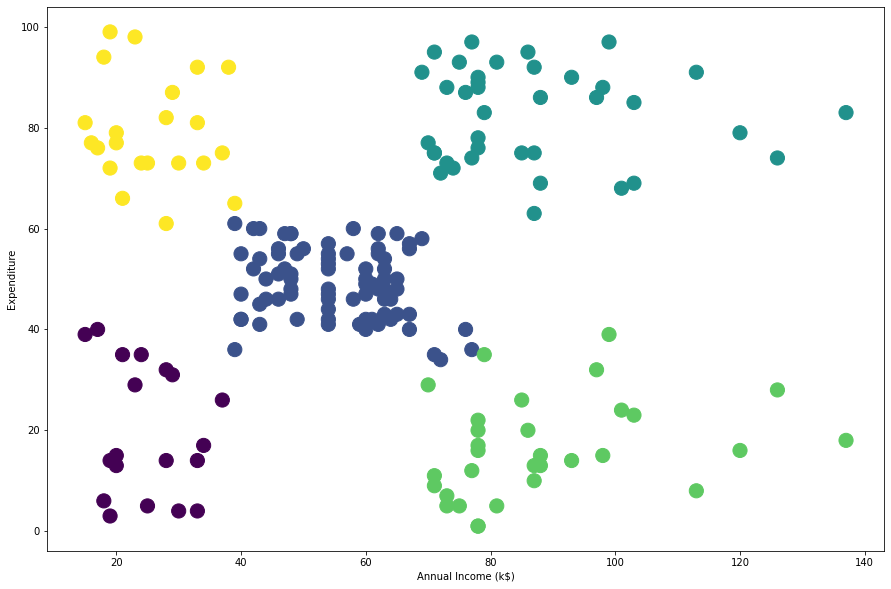

In [149]:
#create model
kmeans = KMeans(n_clusters=5)
data_predict = kmeans.fit_predict(data_model)

plt.figure(figsize=(15,10))
plt.scatter( x = 'Income(k$)' ,y = 'Expenditure' , data = data_model , c = data_predict , s = 200 )
plt.xlabel("Annual Income (k$)")
plt.ylabel("Expenditure")
plt.show()

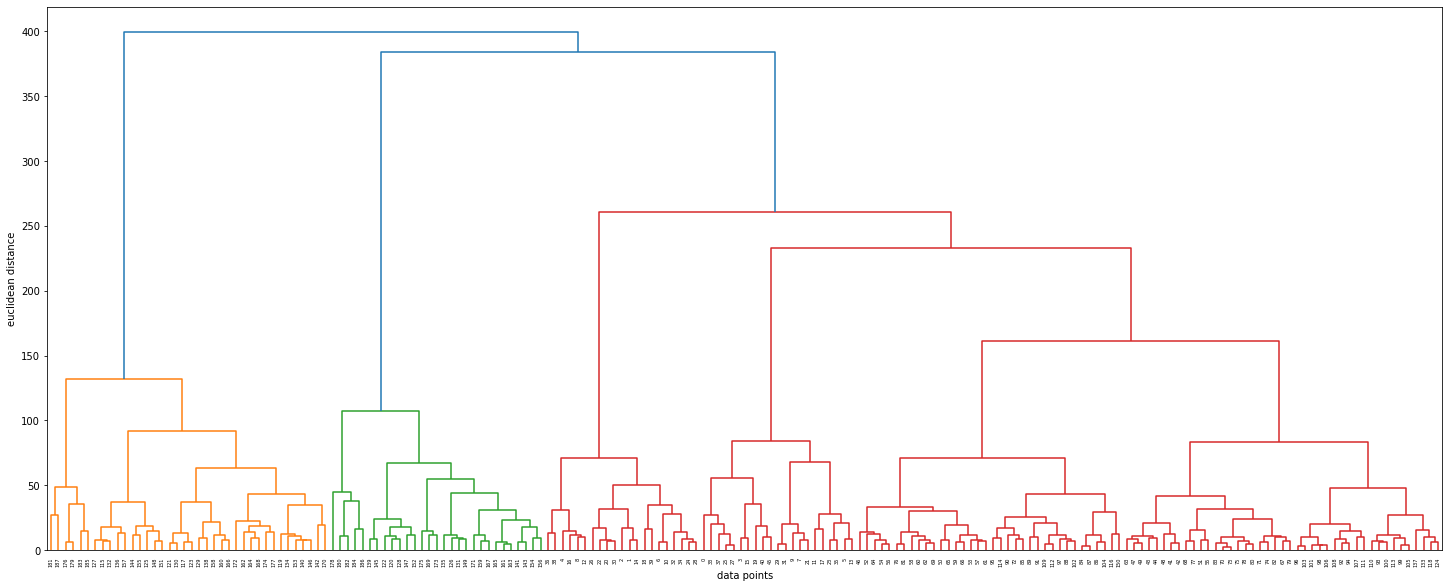

In [150]:
#create demogram and find the best clustering value
merg = linkage(data_model,method="ward")
plt.figure(figsize=(25,10))
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

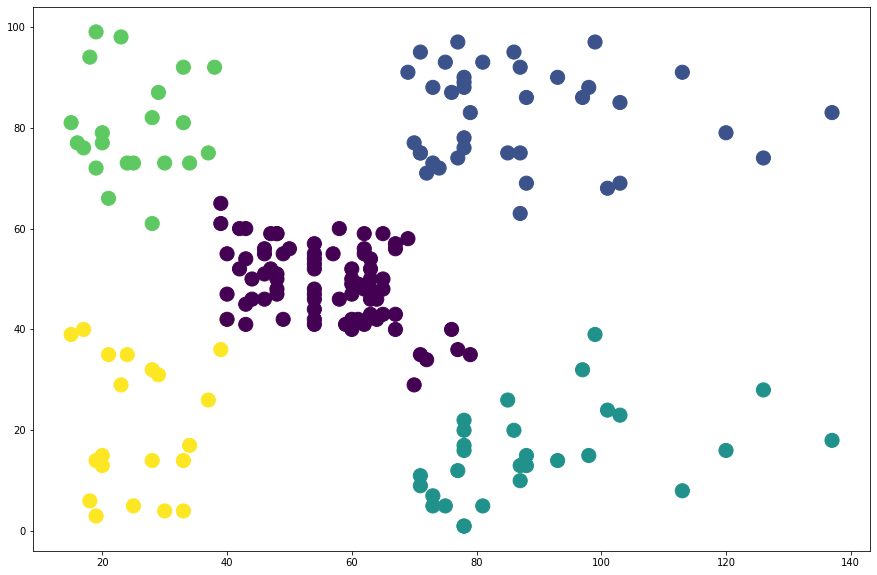

In [151]:
#create model
hiyerartical_cluster = AgglomerativeClustering(n_clusters = 5,affinity= "euclidean",linkage = "ward")
data_predict = hiyerartical_cluster.fit_predict(data_model)
plt.figure(figsize=(15,10))
plt.scatter( x = 'Income(k$)' ,y = 'Expenditure' , data = data_model , c = data_predict , s = 200 )
plt.show()